## Packages and Assets

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import seaborn as sns

import matplotlib.pyplot as plt

import json
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
test = pd.read_csv('../../assets/data/splits/test/preprocessed.csv')

In [3]:
with open('../../assets/traditional_assets/count_vectorizer_vocab.json', 'r') as f:
    count_vectorizer_vocab = json.load(f)
    count_vectorizer_vocab = dict(count_vectorizer_vocab)

In [4]:
model = pickle.load(open("../../assets/traditional_assets/naive_bayes_model.sav", 'rb'))

## Functions

In [5]:
def viewPredictedRows(X_test, y_test, y_pred):
    df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    df['correct'] = df['y_test'] == df['y_pred']
    df['correct'] = df['correct'].apply(lambda x: 'Correct' if x else 'Incorrect')
    df['title'] = X_test
    return df


In [6]:
def show_confusion_matrix(cm):
        print("Confusion Matrix")
        plt.figure(figsize=(10, 7))

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.title('Confusion Matrix')
        plt.show()

## Predictions

In [7]:
cv = CountVectorizer(ngram_range=(1, 1), vocabulary=count_vectorizer_vocab)
X_test = cv.transform(test['title']).toarray()
X_test_names = pd.DataFrame(X_test, columns=cv.get_feature_names_out())


# cv = CountVectorizer(ngram_range=(1, 1))
# X_test = cv.fit_transform(test['title']).toarray()
# # X_test_names = pd.DataFrame(X_test, columns=cv.get_feature_names_out())
# X_test_names

In [8]:
y_test = test['label']

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       609
           1       0.93      0.91      0.92       589
           2       0.90      0.92      0.91       379
           3       0.81      0.91      0.85       225

    accuracy                           0.91      1802
   macro avg       0.89      0.91      0.90      1802
weighted avg       0.91      0.91      0.91      1802

Confusion Matrix


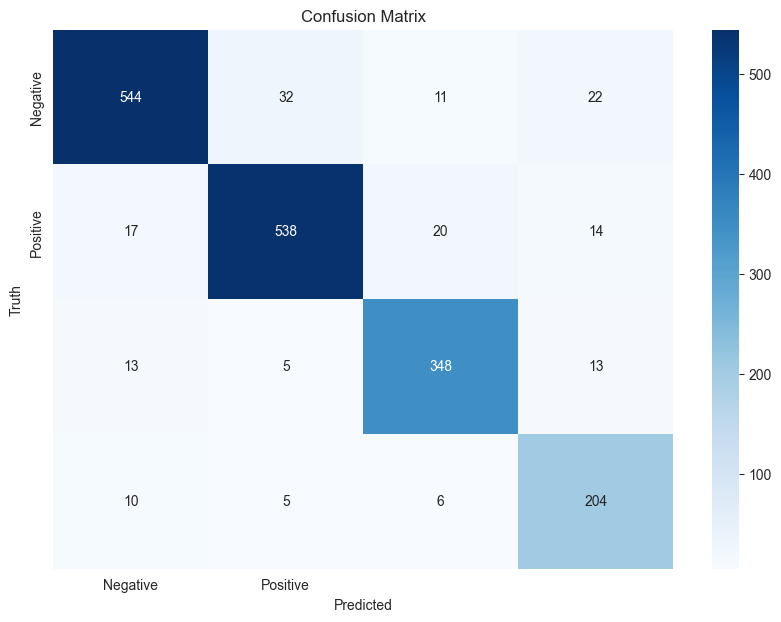

In [9]:



y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
show_confusion_matrix(cm)

In [10]:
df_results = viewPredictedRows(test['title'], y_test, y_pred)
df_results


,y_test,y_pred,correct,title
0,2,2,Correct,agenda dia vale embraer gafisa braskem santos ...
1,1,1,Correct,etanol confirma liquidacao usinas antes <NUM> ...
2,0,0,Correct,irb brasil chega cair <NUM> cento apos carta s...
3,0,0,Correct,em recuperacao judicial livraria saraiva fecha...
4,0,0,Correct,dolar encerra queda <NUM> cento cotado <NUM>
...,...,...,...,...
1797,0,0,Correct,facebook notifica brasileiros dados roubados
1798,0,0,Correct,tesouro direto confira precos desta sexta
1799,1,1,Correct,petrobras convoca assembleia <NUM> agosto eleg...
1800,3,3,Correct,itau itub4 bradesco bbdc4 inadimplencia pressa...
